In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [3]:
# use glob to find all files from folder
path = r'C:/Users/lizba/Desktop/projects/weather_lab/decades'
all_files = glob.glob(path + "/*.csv")
# use concat to combine all files
df = pd.concat((pd.read_csv(f) for f in all_files))
# check sample
df.sample(5)

,Date,Maximum Temperature degrees (F),Minimum Temperature degrees (F),Precipitation (inches),Snow (inches),Snow Depth (inches)
3492,7/24/1929,94,66,0.23,0,0
678,11/10/1971,55,29,0,0,0
851,5/2/1902,69,52,0.14,0,0
2448,1886-09-14,74,40,0,0,M
2298,1877-04-17,56,47,0.81,M,M


In [5]:
# rename columns

df.columns = [['Date','Max_Temp','Min_Temp','Precip','Snow','Snow_Depth']]
df

,Date,Max_Temp,Min_Temp,Precip,Snow,Snow_Depth
0,1871-01-01,M,M,0,M,M
1,1871-01-02,M,M,0,M,M
2,1871-01-03,M,M,0,M,M
3,1871-01-04,M,M,T,M,M
4,1871-01-05,M,M,0,M,M
...,...,...,...,...,...,...
3993,12/7/2020,34,30,0,0,0
3994,12/8/2020,39,29,0,0,0
3995,12/9/2020,52,27,0,0,0
3996,12/10/2020,48,32,0,0,0


In [1]:
# create datetime
# Convert dates to datetime
df['datetime'] = pd.to_datetime(df['Date'])
# extract date componants

df['day'] = df['datetime'].map(lambda x: x.day)
df['month'] = df['datetime'].map(lambda x: x.month)
df['year'] = df['datetime'].map(lambda x: x.year)
df

NameError: name 'pd' is not defined

# # Dealing with Missing Data

## Just Xmas Day

In [4]:
# filter to just xmas for every year

xmas = df[(df['day']==25) & (df['month']==12)]

# uh-oh the numbers are objects!

In [5]:
# extract needed columns
xmas_snow= xmas[['Snow (inches)','year']].copy()


In [6]:
xmas_snow=xmas_snow.apply(pd.to_numeric, errors='coerce')

In [7]:
# check datatypes
xmas_snow

,Snow (inches),year
358,NaN,1871
724,NaN,1872
1089,NaN,1873
1454,NaN,1874
1819,NaN,1875
...,...,...
2184,0.0,2015
2550,NaN,2016
2915,NaN,2017
3280,0.0,2018


In [8]:
# drop nan values to plot
xmas_snow=xmas_snow.dropna()

In [9]:
xmas_snow
exclude_zero = xmas_snow[xmas_snow['Snow (inches)']!=0.00]

In [10]:
pd.set_option('display.max_rows', None)


In [11]:
# plot snow
xmas_snow.sort_values(by=['Snow (inches)']).tail(100)

,Snow (inches),year
1820,0.0,1884
3281,0.0,1928
723,0.0,1931
2550,0.0,1936
359,0.0,1940
...,...,...
359,2.8,1920
2915,3.4,2007
358,5.9,1950
1089,8.0,1932


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

<Figure size 720x216 with 0 Axes>

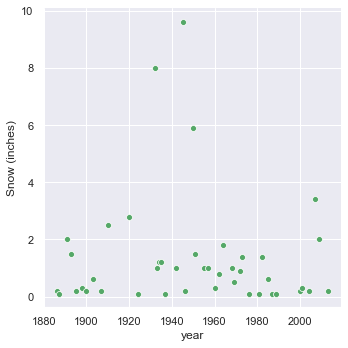

In [78]:
# COULD NOT CHANGE FIGSIZE
sns.set(style="darkgrid")
plt.figure(figsize = (10, 3))
#sns.set(rc={'figure.figsize':(1,10)})
#fig, ax = plt.subplots(figsize=(20, 10))
#plt.figure(figsize=(20,3.5),dpi=200)
#plt.rcParams["figure.figsize"] = [20,10]
sns.relplot(x='year',y='Snow (inches)', data=exclude_zero,color='g')
#plt.figsize=(20, 10)



In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy, pylab

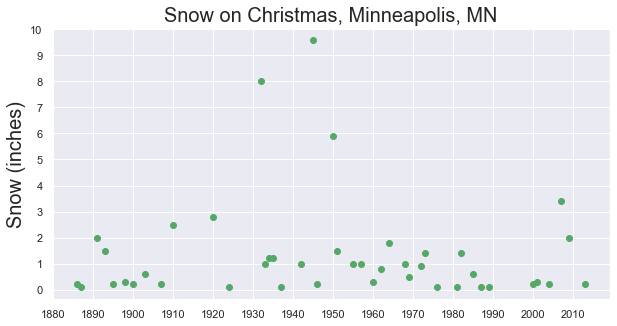

In [90]:
#matplotlib
#setfigsize
plt.figure(figsize = (10, 5))
# set type of plot
plt.scatter(x='year', y='Snow (inches)',data=exclude_zero,c='g',)
plt.yticks(np.arange(0, 11, 1))
plt.xticks(np.arange(1880, 2019, 10))
# set grid
plt.grid(True)
#set title and y label
plt.title('Snow on Christmas, Minneapolis, MN', fontsize = 20)
plt.ylabel('Snow (inches)', fontsize = 20)
plt.show()

In [34]:
4/140


0.02857142857142857

## Practice Query and PFE with Dataset

In [11]:
#df.query('month'== 1)
# filter rows with Pandas query
df.query('month=="1"')['Minimum Temperature degrees (F)'].values

array(['M', 'M', 'M', ..., 18, 18, 27], dtype=object)

In [ ]:
df.query('day == "20"')

In [ ]:
# PFE

temps = df['']

In [16]:
rando = jan['TMIN'].sample(100)
rando

NameError: name 'jan' is not defined

In [ ]:
rando.plot()

In [ ]:
# check for nan
combo['TMIN'].tolist()

In [ ]:
combo['TMIN'].isnull().sum()

In [ ]:
# bday weather for cal
nov_25 = combo[(combo['day']==25) & (combo['month']==11)]
nov_25.sample(10)
nov_25['TMIN'].plot()
nov_25['TMAX'].plot()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure


sns.set(style="darkgrid")


sns.relplot(x='year',y='TMAX', data=nov_25,color='r')
plt.title('High Tempatures on Cals birthday!')
sns.relplot(x='year',y='TMIN', data=nov_25,color='b')
plt.title('Low Tempatures on Cals birthday!')


In [ ]:
# try out numpy
highs = combo['TMAX'].to_numpy()
lows = combo['TMIN'].to_numpy()

In [ ]:
#print max tempature
print("max temp", np.max(highs))

In [ ]:
lows

In [ ]:
# remove nan value
lows = lows[np.logical_not(np.isnan(lows))]
lows

In [ ]:
#low tempature
print("min tempature", np.min(lows))

In [ ]:
col_mean = np.nanmean(lows, axis=0)
print(col_mean)

In [ ]:
print("minimum temp", np.min(lows))

In [ ]:
import seaborn as sns

In [ ]:
ax = sns.violinplot(x="month", y="TMIN", data=combo, color='m')

In [ ]:

ax = sns.violinplot(x="day", y="TMAX", data=Dec_4,color='m')
plt.title('Minneapolis High Tempatures on Dec 4th 1910-2019')